In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# Load the dataset

# Define the data types for columns 0 and 24 as strings
dtype_dict = {'Rowid': str, 'Geolocation': str}

# Load the dataset with specified data types
data = pd.read_csv("Disability_and_Health_Data_System__DHDS_.csv", dtype=dtype_dict)
df = data.copy()

In [3]:
# Display the data types of each column
print(df.dtypes)

Rowid                          object
Year                            int64
LocationAbbr                   object
LocationDesc                   object
DataSource                     object
Category                       object
Indicator                      object
Response                       object
Data_Value_Unit                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Number                        float64
WeightedNumber                float64
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
CategoryID                     object
IndicatorID                    object
Geolocation                    object
LocationID                      int64
ResponseID  

In [4]:
#Getting data types of the columns and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644356 entries, 0 to 644355
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Rowid                       525827 non-null  object 
 1   Year                        644356 non-null  int64  
 2   LocationAbbr                644356 non-null  object 
 3   LocationDesc                644356 non-null  object 
 4   DataSource                  644356 non-null  object 
 5   Category                    644356 non-null  object 
 6   Indicator                   644356 non-null  object 
 7   Response                    635140 non-null  object 
 8   Data_Value_Unit             644356 non-null  object 
 9   Data_Value_Type             644356 non-null  object 
 10  Data_Value                  578578 non-null  float64
 11  Data_Value_Alt              578578 non-null  float64
 12  Data_Value_Footnote_Symbol  65778 non-null   object 
 13  Data_Value_Foo

In [5]:
#Getting number of columns per data type
df.dtypes.value_counts()

object     24
float64     6
int64       2
Name: count, dtype: int64

In [6]:
# Identify column names containing categorical data
categorical_col = df.select_dtypes(object).columns
print(categorical_col)

Index(['Rowid', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Category',
       'Indicator', 'Response', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'CategoryID', 'IndicatorID', 'Geolocation',
       'ResponseID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2'],
      dtype='object')


In [7]:
# Isolate all columns containing categorical data
data_categorical = df[categorical_col]
data_categorical.head()

,Rowid,LocationAbbr,LocationDesc,DataSource,Category,Indicator,Response,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,...,Stratification2,CategoryID,IndicatorID,Geolocation,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2019~11~JOB01~JOB~DISTYPE~SELFDIS~~,DC,District of Columbia,BRFSS,Demographics,Employment status among adults 18 years of age...,Employed,%,Age-adjusted Prevalence,*,...,NaN,DEMOG,JOB,NaN,JOB01,AGEADJPREV,DISTYPE,SELFDIS,NaN,NaN
1,NaN,NJ,New Jersey,BRFSS,Demographics,Education level among adults 18 years of age o...,College Graduate,%,Age-adjusted Prevalence,NaN,...,NaN,DEMOG,EDUCATE,NaN,EDUCATE03,AGEADJPREV,DISTYPE,INDDIS,NaN,NaN
2,NaN,WV,West Virginia,BRFSS,Demographics,Education level among adults 18 years of age o...,High School Graduate,%,Age-adjusted Prevalence,NaN,...,NaN,DEMOG,EDUCATE,NaN,EDUCATE02,AGEADJPREV,DISTYPE,INDDIS,NaN,NaN
3,NaN,RI,Rhode Island,BRFSS,Demographics,Income level among adults 18 years of age or o...,"$25,000 to <$35,000",%,Age-adjusted Prevalence,NaN,...,NaN,DEMOG,INCOMEN,NaN,INCOME03,AGEADJPREV,DISTYPE,COGDIS,NaN,NaN
4,NaN,HHS8,HHS Region 8,BRFSS,Demographics,Income level among adults 18 years of age or o...,"$25,000 to <$35,000",%,Age-adjusted Prevalence,NaN,...,NaN,DEMOG,INCOMEN,NaN,INCOME03,AGEADJPREV,DISTYPE,INDDIS,NaN,NaN


In [8]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Print the missing values counts
print("Missing values in the DataFrame:")
print(missing_values)

Missing values in the DataFrame:
Rowid                         118529
Year                               0
LocationAbbr                       0
LocationDesc                       0
DataSource                         0
Category                           0
Indicator                          0
Response                        9216
Data_Value_Unit                    0
Data_Value_Type                    0
Data_Value                     65778
Data_Value_Alt                 65778
Data_Value_Footnote_Symbol    578578
Data_Value_Footnote           578578
Low_Confidence_Limit           65778
High_Confidence_Limit          65778
Number                         65778
WeightedNumber                 65778
StratificationCategory1            0
Stratification1                    0
StratificationCategory2       234636
Stratification2               234636
CategoryID                         0
IndicatorID                        0
Geolocation                   567156
LocationID                         0
Respo

In [9]:
# Drop the specified columns
df = df.drop(columns=['Rowid', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'StratificationCategory2',	'Stratification2', 
                              'Data_Value_Alt','DataSource', 'Geolocation','LocationID','ResponseID','DataValueTypeID','StratificationCategoryID1',
                              'StratificationID1','StratificationCategoryID2','StratificationID2'])

# Display the first few rows of the cleaned DataFrame
# df_cleaned.head()

In [10]:
# Using count() attribute
df_cleaned_count = df.count()
print(df_cleaned_count)
print(df.shape)

Year                       644356
LocationAbbr               644356
LocationDesc               644356
Category                   644356
Indicator                  644356
Response                   635140
Data_Value_Unit            644356
Data_Value_Type            644356
Data_Value                 578578
Low_Confidence_Limit       578578
High_Confidence_Limit      578578
Number                     578578
WeightedNumber             578578
StratificationCategory1    644356
Stratification1            644356
CategoryID                 644356
IndicatorID                644356
dtype: int64
(644356, 17)


In [11]:
# Display summary statistics
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,644356.0,NaN,NaN,NaN,2018.437783,1.69878,2016.0,2017.0,2018.0,2020.0,2021.0
LocationAbbr,644356,65,DC,10068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LocationDesc,644356,65,District of Columbia,10068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,644356,8,Health Risks & Behaviors,147336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indicator,644356,42,Body mass index category among adults 18 years...,36864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Response,635140,62,No,183218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data_Value_Unit,644356,1,%,644356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data_Value_Type,644356,2,Age-adjusted Prevalence,483384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data_Value,578578.0,NaN,NaN,NaN,42.25289,28.947211,0.1,17.5,35.9,66.2,100.0
Low_Confidence_Limit,578578.0,NaN,NaN,NaN,37.898096,28.456481,0.0,13.6,30.0,60.3,99.9


In [12]:
# Analysis of Data Value column based on Indicator.
# Assuming the data is missing and doesn't left blank intentionally.
indicators = df.groupby('Indicator')['Data_Value'].apply(lambda x: x.isnull().sum())
indicators

Indicator
Aerobic physical activity level among adults 18 years of age or older                                                       539
Attempted to quit smoking in the past 12 months among adults 18 years of age or older who are current every day smokers    3610
Average hours of sleep in a 24-hour period among adults 18 years of age or older                                           1721
Binge drinking in the past 30 days among adults 18 years of age or older                                                   1388
Body mass index category among adults 18 years of age or older                                                             6760
Could not see a doctor due to cost in the past 12 months among adults 18 years of age or older                             1196
Current asthma among adults 18 years of age or older                                                                       1442
Current e-cigarette use among adults 18 years of age or older                                 

In [13]:
# Handling Missing values for Data Value, Low and High Confidence Limit, Number and Weighted Number based on Indicator column.

def fill_missing_with_indicator_mean(df):
    # Calculate the mean values for each indicator
    indicator_means = df.groupby('Indicator').agg({
        'Data_Value': 'mean',
        'Low_Confidence_Limit': 'mean',
        'High_Confidence_Limit': 'mean',
        'Number': 'mean',
        'WeightedNumber':'mean'
    }).reset_index()

    # Fill missing values in 'Data_Value' column
    df['Data_Value'].fillna(df['Indicator'].map(indicator_means.set_index('Indicator')['Data_Value']), inplace=True)

    # Fill missing values in 'Low_Confidence_Limit' column
    df['Low_Confidence_Limit'].fillna(df['Indicator'].map(indicator_means.set_index('Indicator')['Low_Confidence_Limit']), inplace=True)

    # Fill missing values in 'High_Confidence_Limit' column
    df['High_Confidence_Limit'].fillna(df['Indicator'].map(indicator_means.set_index('Indicator')['High_Confidence_Limit']), inplace=True)

    df['Number'].fillna(df['Indicator'].map(indicator_means.set_index('Indicator')['Number']), inplace=True)

    df['WeightedNumber'].fillna(df['Indicator'].map(indicator_means.set_index('Indicator')['WeightedNumber']), inplace=True)

    return df

In [14]:
df = fill_missing_with_indicator_mean(df)
df.count()

Year                       644356
LocationAbbr               644356
LocationDesc               644356
Category                   644356
Indicator                  644356
Response                   635140
Data_Value_Unit            644356
Data_Value_Type            644356
Data_Value                 644356
Low_Confidence_Limit       644356
High_Confidence_Limit      644356
Number                     644356
WeightedNumber             644356
StratificationCategory1    644356
Stratification1            644356
CategoryID                 644356
IndicatorID                644356
dtype: int64

In [15]:
# Create a new Feature named Income_Level_Category based on Income level values.
df['Indicator'].unique()

array(['Employment status among adults 18 years of age or older',
       'Education level among adults 18 years of age or older',
       'Income level among adults 18 years of age or older',
       'Disability status and types among adults 18 years of age or older by veteran status',
       'Marital status among adults 18 years of age or older',
       'Body mass index category among adults 18 years of age or older',
       'Smoking status among adults 18 years of age or older',
       'Binge drinking in the past 30 days among adults 18 years of age or older',
       'Disability status and types among adults 18 years of age or older',
       'Disability status and types among adults 18 years of age or older by age group',
       'Current asthma among adults 18 years of age or older',
       'Ever had diabetes among adults 18 years of age or older',
       'Ever had a stroke among adults 18 years of age or older',
       'Up-to-date cervical cancer screening among females 21 to 65 years

In [16]:
df['Stratification1'].unique()

array(['Self-care Disability', 'Independent Living Disability',
       'Cognitive Disability', 'Hearing Disability', 'Any Disability',
       'No Disability', 'Mobility Disability', 'Vision Disability',
       'Overall'], dtype=object)

In [17]:
df['Response'].unique()

array(['Employed', 'College Graduate', 'High School Graduate',
       '$25,000 to <$35,000', 'Veteran', 'Widowed', 'Other',
       'Underweight', '$15,000 to <$25,000', 'Normal Weight',
       'Never Smoker', 'No', '<$15,000', 'Never Married', '$50,000+',
       'Overweight', 'Obese', 'Divorced / Separated', 'Yes',
       'Married / Unmarried Couple', 'Hearing Disability',
       '$35,000 to <$50,000', '45-64', 'Out of Work', 'Non-Veteran',
       'Some High School or Less', '18-44', '65+', 'Current Smoker',
       'Unable to Work', 'Vision Disability', nan, '0 Days', '14+ Days',
       '1-6 Hours', '1-13 Days', '2+ Providers',
       'Independent Living Disability', '10+ Hours', '1 Provider',
       '7-9 Hours', 'Female', 'Former Smoker',
       'Other / Multirace, non-Hispanic', 'White, non-Hispanic',
       'Asian, non-Hispanic', 'No Disability',
       'Native Hawaiian or Other Pacific Islander, non-Hispanic',
       'American Indian or Alaska Native, non-Hispanic', 'Hispanic',
   

In [18]:
# Filter the DataFrame to include only relevant indicators
relevant_indicators = ['Employment status among adults 18 years of age or older',
                      'Income level among adults 18 years of age or older']
filtered_df = df[df['Indicator'].isin(relevant_indicators)]

# Group by 'Stratification' and 'Indicator', and aggregate 'Response' values
grouped_df = filtered_df.groupby(['Stratification1', 'Indicator'])['Response'].first().unstack()

# Create a new column representing socioeconomic status by combining 'Employment status' and 'Income level'
grouped_df['Socioeconomic Status'] = grouped_df['Employment status among adults 18 years of age or older'] + ' & ' + grouped_df['Income level among adults 18 years of age or older']

# Reset index to convert 'Stratification' back to a regular column
grouped_df.reset_index(inplace=True)

# Merge the new socioeconomic status column back into the original DataFrame
df = pd.merge(df, grouped_df[['Stratification1', 'Socioeconomic Status']], on='Stratification1', how='left')



In [19]:
# Create a feature named chronic disease describing whether person had a chrnic disease or not.
chronic_diseases = ['Current asthma among adults 18 years of age or older',
                    'Ever had diabetes among adults 18 years of age or older',
                    'Ever had a stroke among adults 18 years of age or older',
                    'Ever had cancer (excluding skin cancer) among adults 18 years of age or older',
                    'Ever had heart disease among adults 18 years of age or older',
                    'Ever had chronic obstructive pulmonary disease (COPD) among adults 18 years of age or older']
df['chronic_disease'] = df['Indicator'].isin(chronic_diseases).astype(int)

In [20]:
def extract_income_category(x):
    if isinstance(x, str) and '$' in x:
        return x
    else:
        return None

df['Income_Category'] = df['Response'].apply(extract_income_category)

# Create a new column 'Education_Level' by extracting education levels from 'Response'
def extract_education_level(x):
    if isinstance(x, str) and ('School' in x or 'College' in x):
        return x
    else:
        return None

df['Education_Level'] = df['Response'].apply(extract_education_level)

In [21]:
# Define a function to generate the new feature
def generate_disability_feature(row):
    if row['Indicator'].startswith('Disability status') and row['Stratification1'] != 'Overall':
        return f"{row['Indicator']} - {row['Stratification1']}"
    else:
        return None  # If the row doesn't meet the criteria, return None or any other appropriate value

# Apply the function to create the new column
df['Disability_Status_Feature'] = df.apply(generate_disability_feature, axis=1)

In [22]:
# Count of Responses by Indicator and Stratification
df['Response_Count'] = df.groupby(['Indicator', 'Stratification1'])['Response'].transform('count')

# Percentage of Responses by Indicator and Stratification
df['Response_Percentage'] = df.groupby(['Indicator', 'Stratification1'])['Response'].transform(lambda x: x.count() / len(x))

# Summary statistics of Responses by Indicator and Stratification
summary_stats = df.groupby(['Indicator', 'Stratification1'])['Response'].describe()
summary_stats = summary_stats.reset_index().rename(columns={'50%': 'Median', 'std': 'Standard_Deviation'})

# Indicator-Stratification Interaction Terms
df['Indicator_Stratification_Interact'] = df['Indicator'] + '_' + df['Stratification1']

# Binary Encoding for Response Categories
binary_encoded = pd.get_dummies(df, columns=['Response'], prefix='Response')

# Concatenate the original DataFrame with the binary-encoded columns
df = pd.concat([df, binary_encoded.iloc[:, -len(df['Response'].unique()):]], axis=1)

In [23]:
df.head()

,Year,LocationAbbr,LocationDesc,Category,Indicator,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Low_Confidence_Limit,...,Response_Self-care Disability,Response_Some High School or Less,Response_Sufficiently Active,Response_Unable to Work,Response_Underweight,Response_Veteran,Response_Vision Disability,"Response_White, non-Hispanic",Response_Widowed,Response_Yes
0,2019,DC,District of Columbia,Demographics,Employment status among adults 18 years of age...,Employed,%,Age-adjusted Prevalence,26.303808,21.790104,...,False,False,False,False,False,False,False,False,False,False
1,2020,NJ,New Jersey,Demographics,Education level among adults 18 years of age o...,College Graduate,%,Age-adjusted Prevalence,15.000000,11.700000,...,False,False,False,False,False,False,False,False,False,False
2,2020,WV,West Virginia,Demographics,Education level among adults 18 years of age o...,High School Graduate,%,Age-adjusted Prevalence,69.000000,63.300000,...,False,False,False,False,False,False,False,False,False,False
3,2020,RI,Rhode Island,Demographics,Income level among adults 18 years of age or o...,"$25,000 to <$35,000",%,Age-adjusted Prevalence,10.700000,7.200000,...,False,False,False,False,False,False,False,False,False,False
4,2020,HHS8,HHS Region 8,Demographics,Income level among adults 18 years of age or o...,"$25,000 to <$35,000",%,Age-adjusted Prevalence,13.500000,11.100000,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'Category', 'Indicator',
       'Response', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Number',
       'WeightedNumber', 'StratificationCategory1', 'Stratification1',
       'CategoryID', 'IndicatorID', 'Socioeconomic Status', 'chronic_disease',
       'Income_Category', 'Education_Level', 'Disability_Status_Feature',
       'Response_Count', 'Response_Percentage',
       'Indicator_Stratification_Interact',
       'Indicator_Stratification_Interact', 'Response_$15,000 to <$25,000',
       'Response_$25,000 to <$35,000', 'Response_$35,000 to <$50,000',
       'Response_$50,000+', 'Response_0 Days', 'Response_1 Provider',
       'Response_1-13 Days', 'Response_1-6 Hours', 'Response_10+ Hours',
       'Response_14+ Days', 'Response_18-44', 'Response_2+ Providers',
       'Response_45-64', 'Response_65+', 'Response_7-9 Hours',
       'Response_<$15,000',
       'Response_Americ

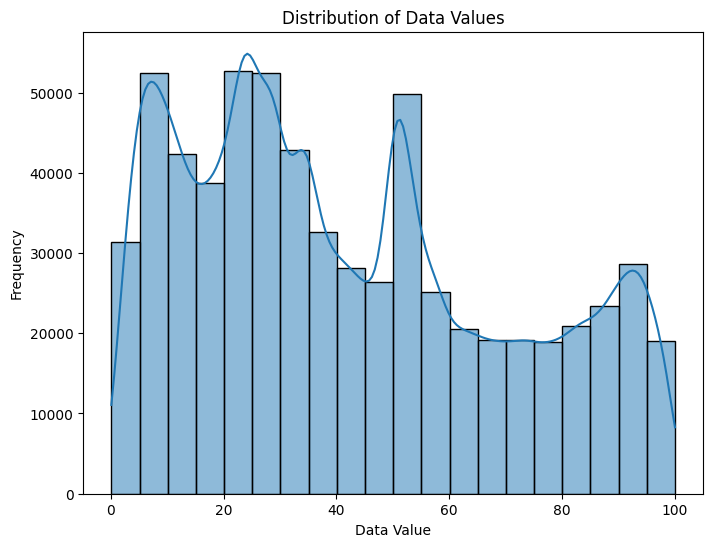

In [25]:
#Histogram of Data_Value
plt.figure(figsize=(8, 6))
sns.histplot(df['Data_Value'], bins=20, kde=True)
plt.title('Distribution of Data Values')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()

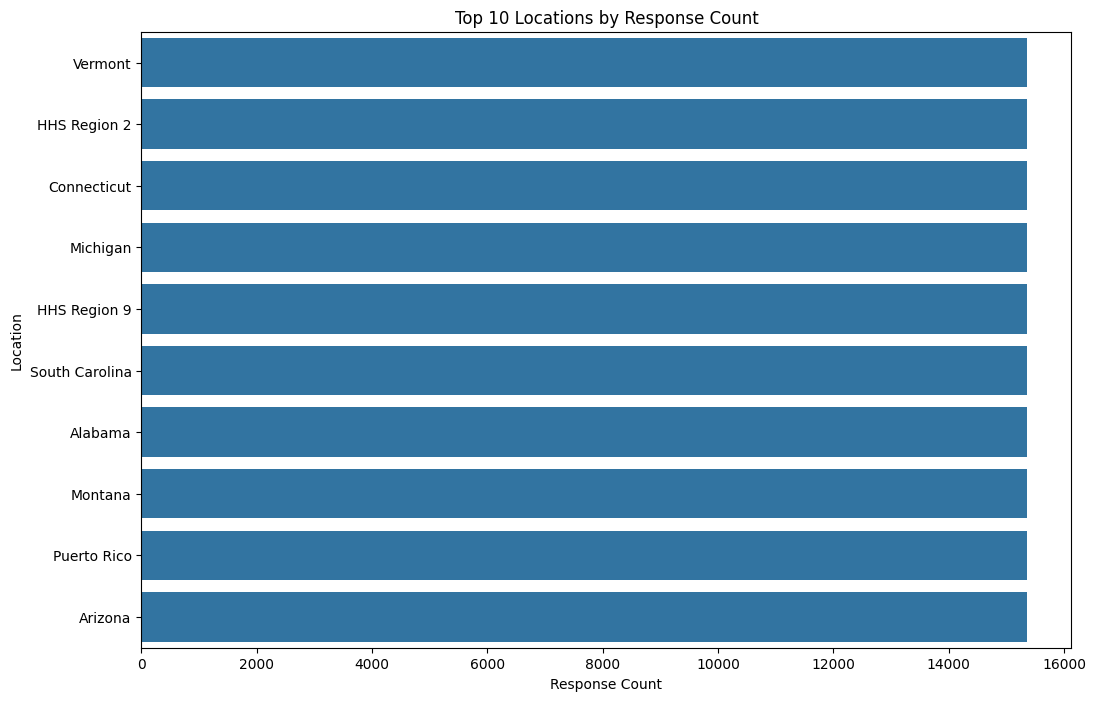

In [26]:
# Bar plot of Response_Count by LocationDesc
plt.figure(figsize=(12, 8))
sns.barplot(x ='Response_Count', y='LocationDesc', data=df.sort_values(by='Response_Count', ascending=False).head(10))
plt.title('Top 10 Locations by Response Count')
plt.xlabel('Response Count')
plt.ylabel('Location')
plt.show()

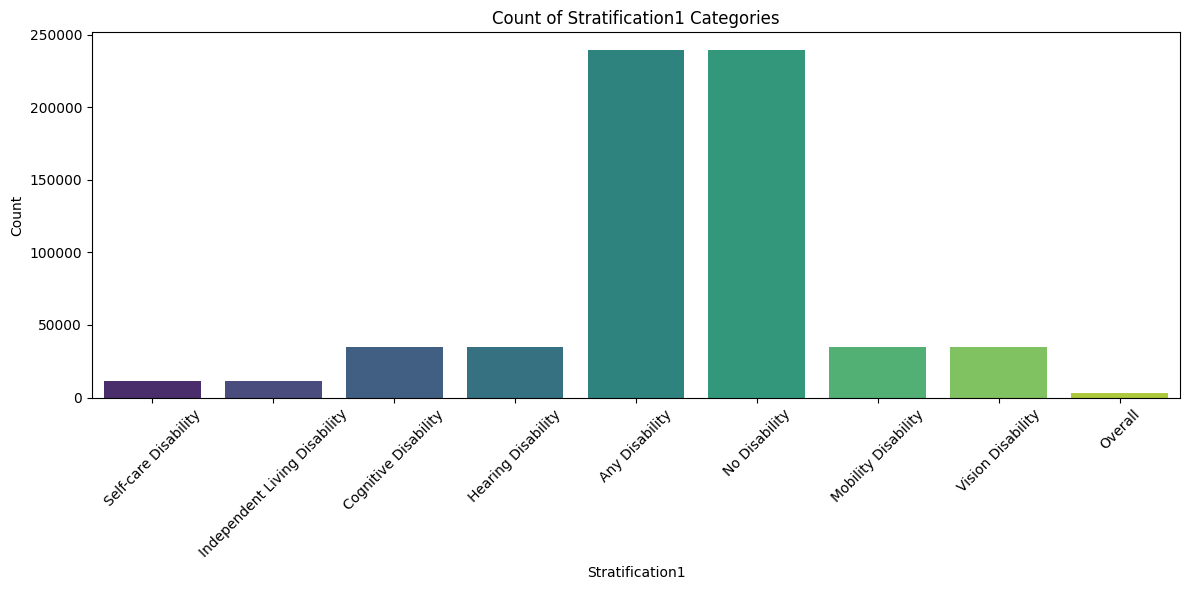

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Stratification1', data=df, palette='viridis')
plt.title('Count of Stratification1 Categories')
plt.xlabel('Stratification1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

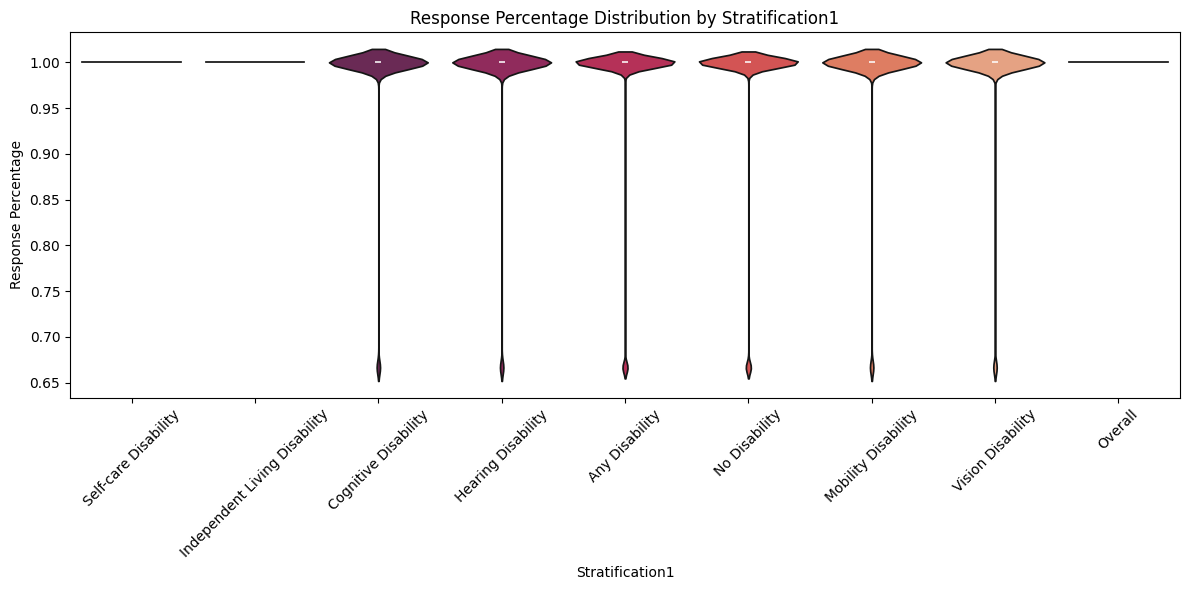

In [28]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Stratification1', y='Response_Percentage', data=df, palette='rocket')
plt.title('Response Percentage Distribution by Stratification1')
plt.xlabel('Stratification1')
plt.ylabel('Response Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

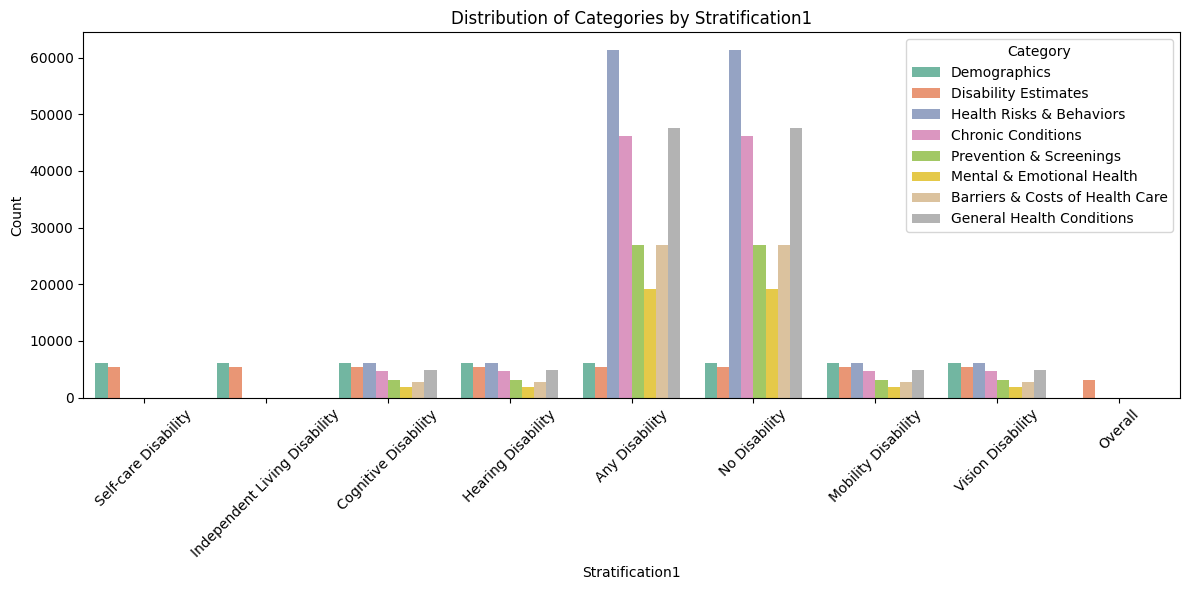

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Stratification1', hue='Category', data=df, palette='Set2')
plt.title('Distribution of Categories by Stratification1')
plt.xlabel('Stratification1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category', loc='upper right')
plt.tight_layout()
plt.show()

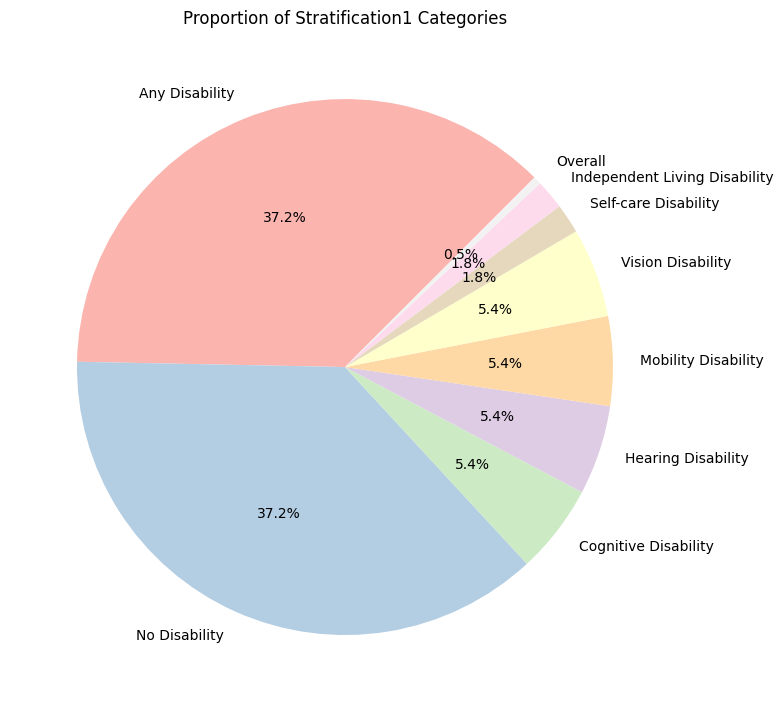

In [30]:
plt.figure(figsize=(8, 8))
df['Stratification1'].value_counts().plot.pie(autopct='%1.1f%%', startangle=45, colors=sns.color_palette('Pastel1', len(df['Stratification1'].unique())))
plt.title('Proportion of Stratification1 Categories')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [31]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score, recall_score
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [32]:
data_encoded = pd.get_dummies(df)
X = df.drop('Stratification1',axis = True)
y = df['Stratification1']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded, y, test_size=0.2, random_state=42)

In [34]:
clf_encoded = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 0)
clf_encoded.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

[Text(0.7142857142857143, 0.9, 'x[324] <= 0.5\ngini = 0.711\nsamples = 515484\nvalue = [191590, 27853, 27871, 9185, 27843, 191792, 2424, 9201\n27725]'),
 Text(0.5714285714285714, 0.7, 'x[319] <= 0.5\ngini = 0.618\nsamples = 323692\nvalue = [191590, 27853, 27871, 9185, 27843, 0, 2424, 9201\n27725]'),
 Text(0.42857142857142855, 0.5, 'x[321] <= 0.5\ngini = 0.813\nsamples = 132102\nvalue = [0, 27853, 27871, 9185, 27843, 0, 2424, 9201, 27725]'),
 Text(0.2857142857142857, 0.3, 'x[320] <= 0.5\ngini = 0.77\nsamples = 104231\nvalue = [0, 27853, 0, 9185, 27843, 0, 2424, 9201, 27725]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.705\nsamples = 76378\nvalue = [0, 0, 0, 9185, 27843, 0, 2424, 9201, 27725]'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 27853\nvalue = [0, 27853, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 27871\nvalue = [0, 0, 27871, 0, 0, 0, 0, 0, 0]'),
 Text(0.7142857142857143, 0.5, 'gini = 0.0\nsamples = 191590\nvalue = [191590, 0, 0, 0, 

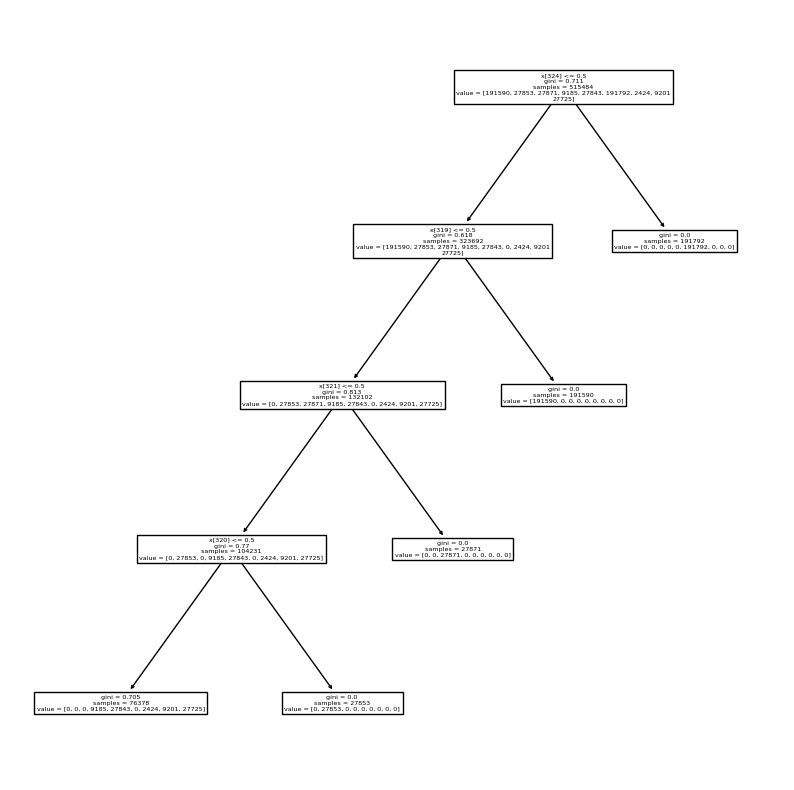

In [35]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf_encoded.fit(X_train, y_train).fit(X_train, y_train))

In [36]:
y_pred_encoded = clf_encoded.predict(X_test)

In [37]:
accuracy_encoded = accuracy_score(y_test, y_pred_encoded)
report_encoded = classification_report(y_test, y_pred_encoded)

print("Accuracy (Encoded):", accuracy_encoded)
print("\nClassification Report (Encoded):\n", report_encoded)

Accuracy (Encoded): 0.9043159103606679

Classification Report (Encoded):
                                precision    recall  f1-score   support

               Any Disability       1.00      1.00      1.00     48024
         Cognitive Disability       1.00      1.00      1.00      6901
           Hearing Disability       1.00      1.00      1.00      6883
Independent Living Disability       0.00      0.00      0.00      2335
          Mobility Disability       0.36      1.00      0.53      6911
                No Disability       1.00      1.00      1.00     47822
                      Overall       0.00      0.00      0.00       648
         Self-care Disability       0.00      0.00      0.00      2319
            Vision Disability       0.00      0.00      0.00      7029

                     accuracy                           0.90    128872
                    macro avg       0.48      0.56      0.50    128872
                 weighted avg       0.87      0.90      0.88    128872



In [38]:
acc_dt = accuracy_score(y_test,y_pred_encoded)
acc_dt

0.9043159103606679

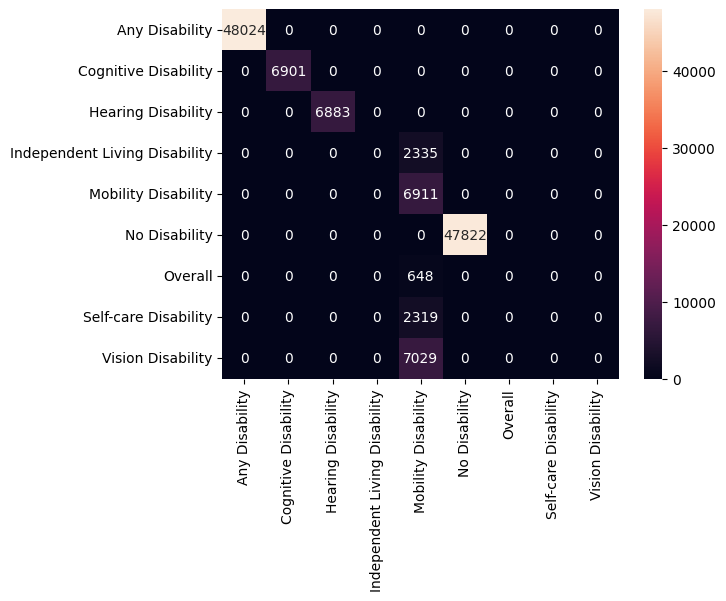

In [39]:
cm_train = confusion_matrix(y_test,y_pred_encoded)
class_names = ['Any Disability', 'Cognitive Disability', 'Hearing Disability', 'Independent Living Disability', 'Mobility Disability', 'No Disability', 'Overall', 'Self-care Disability', 'Vision Disability']

sns.heatmap(cm_train, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.show()

In [40]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [41]:
y_pred_rf = rf.predict(X_test)

In [42]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Accuracy (Encoded):", accuracy_rf)
print("\nClassification Report (Encoded):\n", report_rf)

Accuracy (Encoded): 0.9237538022223601

Classification Report (Encoded):
                                precision    recall  f1-score   support

               Any Disability       0.87      1.00      0.93     48024
         Cognitive Disability       1.00      1.00      1.00      6901
           Hearing Disability       1.00      0.27      0.42      6883
Independent Living Disability       1.00      0.23      0.37      2335
          Mobility Disability       1.00      1.00      1.00      6911
                No Disability       0.95      1.00      0.97     47822
                      Overall       1.00      0.23      0.37       648
         Self-care Disability       0.00      0.00      0.00      2319
            Vision Disability       1.00      0.98      0.99      7029

                     accuracy                           0.92    128872
                    macro avg       0.87      0.63      0.67    128872
                 weighted avg       0.91      0.92      0.90    128872



In [43]:
acc_rf = accuracy_score(y_test,y_pred_rf)
acc_rf

0.9237538022223601

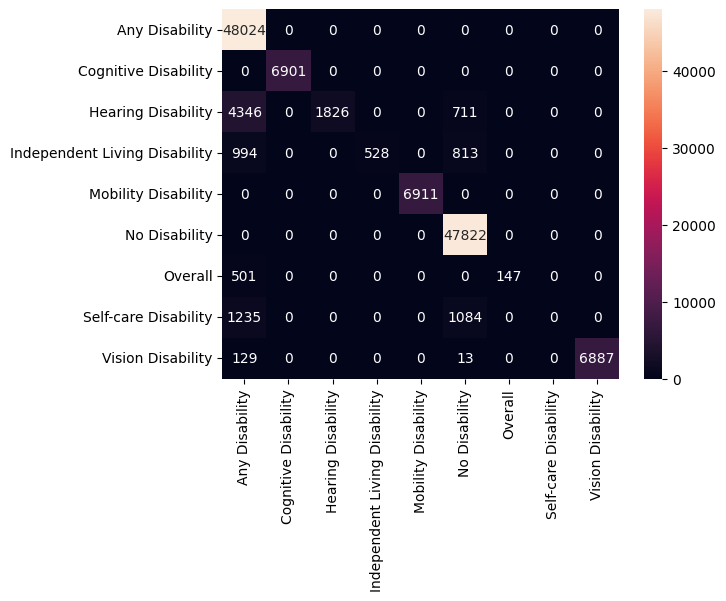

In [44]:
cm_train = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm_train, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.show()

In [45]:
# Feature Selection for SVM.
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10) 
selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [ ]:
cl_svm = svm.SVC(kernel = 'rbf', gamma = 0.6, C = 0.1)
cl_svm.fit(X_train_selected, y_train)

In [ ]:
y_pred_svm = cl_svm.predict(X_test_selected)

In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("Accuracy (Encoded):", accuracy_svm)
print("\nClassification Report (Encoded):\n", report_svm)

In [ ]:
svm_rf = accuracy_score(y_test,y_pred_rf)
svm_rf

In [ ]:
cm_train = confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm_train, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.show()

In [46]:
sc = StandardScaler()
le = LabelEncoder()
X_train_selected = sc.fit_transform(X_train_selected)
X_test_selected = sc.fit_transform(X_test_selected)
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [47]:
lda = LinearDiscriminantAnalysis(n_components=2)
 
# Fit the model on the training data
lda.fit(X_train_selected, y_train)

LinearDiscriminantAnalysis(n_components=2)

In [48]:
y_pred = lda.predict(X_test_selected)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9284561425290211


In [50]:
y_pred = lda.predict(X_test_selected)

In [51]:
accuracy_lda = accuracy_score(y_test, y_pred)
report_lda = classification_report(y_test, y_pred)

print("Accuracy", accuracy_rf)
print("\nClassification Report:\n", report_rf)

Accuracy 0.9237538022223601

Classification Report:
                                precision    recall  f1-score   support

               Any Disability       0.87      1.00      0.93     48024
         Cognitive Disability       1.00      1.00      1.00      6901
           Hearing Disability       1.00      0.27      0.42      6883
Independent Living Disability       1.00      0.23      0.37      2335
          Mobility Disability       1.00      1.00      1.00      6911
                No Disability       0.95      1.00      0.97     47822
                      Overall       1.00      0.23      0.37       648
         Self-care Disability       0.00      0.00      0.00      2319
            Vision Disability       1.00      0.98      0.99      7029

                     accuracy                           0.92    128872
                    macro avg       0.87      0.63      0.67    128872
                 weighted avg       0.91      0.92      0.90    128872



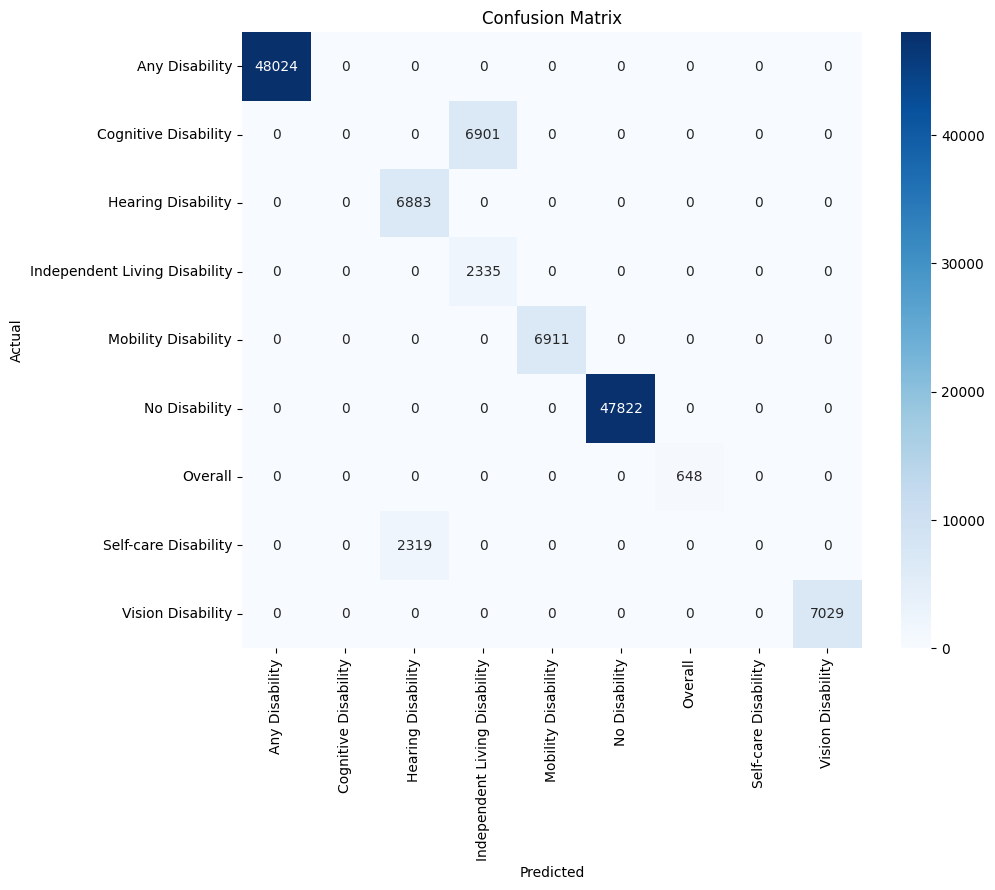

In [52]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.drop(['LocationAbbr', 'LocationDesc'], axis=1)

In [60]:
scaler = StandardScaler()

In [61]:
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns  # bool included if boolean columns present
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
# Create transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # OneHotEncode categorical columns

# Combine transformers into a preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [63]:
X_train = X_train.rename(columns=lambda x: f'{x}_dup' if X_train.columns.tolist().count(x) > 1 else x)

In [64]:
#  If 'Indicator_Stratification_Interact' should not be there, remove it from the column transformer configuration
categorical_cols = [col for col in categorical_cols if col != 'Indicator_Stratification_Interact']

# create the preprocessor and pipeline here with the updated `categorical_cols`
preprocessor = ColumnTransformer(
    transformers=[
        # Assuming 'numeric_transformer' and 'categorical_transformer' have been defined earlier
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Try fitting the pipeline again
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Year', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Number', 'WeightedNumber', 'Response_Count', 'Response_Percentage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute...
                                                   'Response_0 Days',
                                                   'Response_1 Provider',
                                                   'Response_1-13 Days',
                                                   'Response_1-6 Hours',
                                                   'Response_10+ Hours',
                                                   'Response_14+ Days',
                                                   'Response_18-44',
                                                   'Response_2+ Providers',
                                                   'Response_45-64',
                                                   'Response_65+',
                                                   'Response_7-9 Hours',
                                                   'Response_<$15,000',
                                                   'Response_American Indian '
                                                   'or Alaska Native, '
                                                   'non-Hispanic',
                                                   'Response_Any Disability', ...])])),
                ('classifier', LogisticRegression())])

In [65]:
# Evaluate the pipeline on test data
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

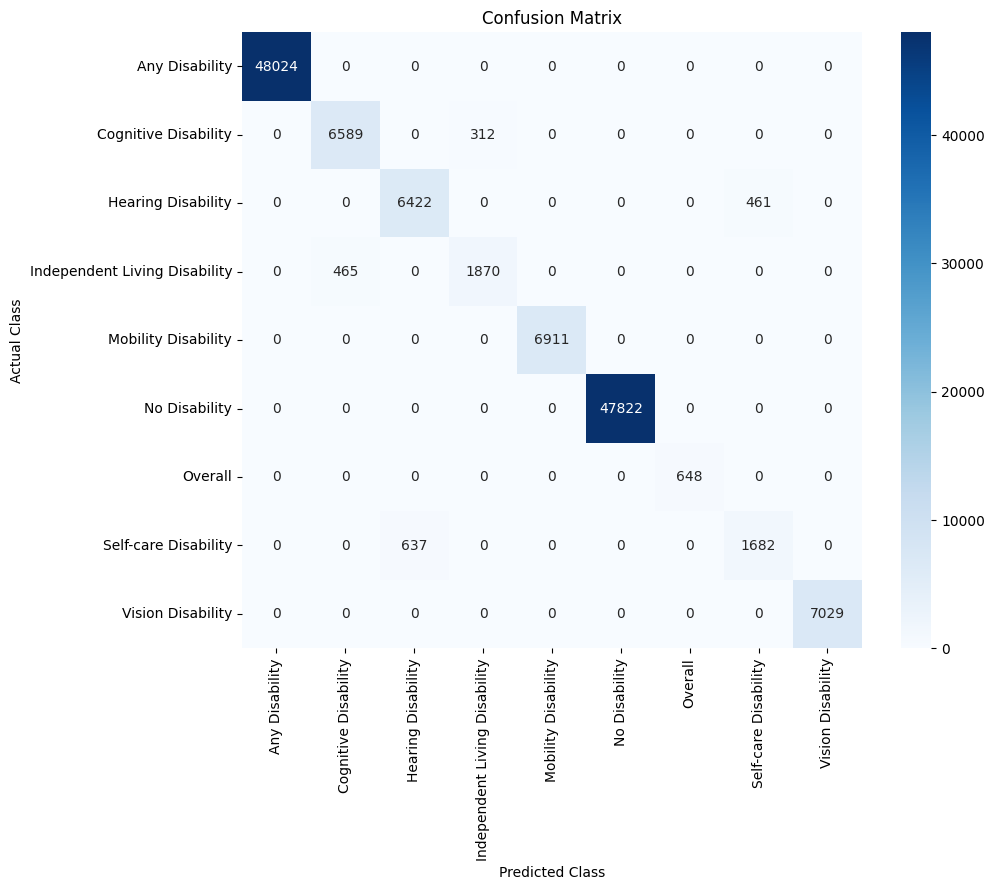

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `conf_matrix` is your confusion matrix and `class_names` are the names of the classes in the same order
class_names = ['Any Disability', 'Cognitive Disability', 'Hearing Disability', 'Independent Living Disability', 'Mobility Disability', 'No Disability', 'Overall', 'Self-care Disability', 'Vision Disability']

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()